In [1]:
%matplotlib inline
import numpy as np
import os
import sys
import traceback
from scipy.io import loadmat
import math
import scipy.signal as signal
from scipy.signal import *
#from scipy.signal import mfreqz, impz, kaiser, group_delay, hilbert
import matplotlib.pyplot as plt

from numpy import cos, sin, pi, absolute, arange
from numpy.random import normal
from scipy.signal import kaiserord, lfilter, firwin, freqz
#from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show
from math import sqrt, log10
from scipy.io import loadmat

In [16]:
matdata = loadmat('/Users/smitra/projects/webChronux/kaisermatlab.mat')
len(matdata['bAlpha'][0])

281

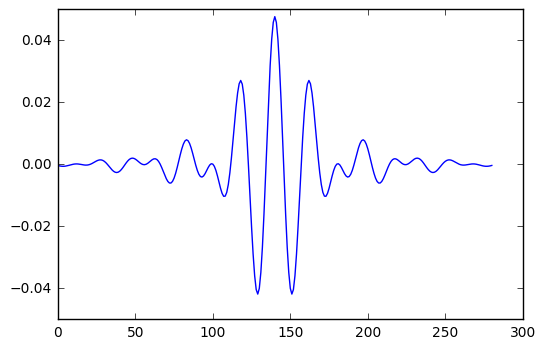

In [17]:
plt.plot(matdata['bAlpha'][0])

In [48]:
eegData = loadmat('/Users/smitra/projects/webChronux/utils/EEG181.mat')
eegFS = 250 # sampling frequency
eegData = eegData["eegData"]
eeg = eegData[14]
eeg = eeg[50 * eegFS - 1 : 80 * eegFS - 1 ]   
eeg = eeg - np.mean(eeg, axis = 0) 
edges = np.linspace(-math.pi,math.pi,21) 

lcut = 9.0 
hcut = 13.0
sample_rate = 250.0
nyq = sample_rate / 2.0
width = 1.5/nyq # pass to stop transition width
ripple_db = 40.0
N, beta = kaiserord(ripple_db, width)
cutoff_hz = lcut
hpftaps = firwin(N, cutoff_hz/nyq, window=('kaiser', beta), pass_zero=False)    
hpftaps = [-1*a for a in hpftaps]
midPoint = int(np.round(len(hpftaps)/2))
if midPoint % 2 != 0:
    midPoint = midPoint -1
hpftaps[midPoint] = hpftaps[midPoint] + 1
cutoff_hz = hcut
lpftaps = firwin(N, cutoff_hz/nyq, window=('kaiser', beta), pass_zero=False)
lpftaps[midPoint] = lpftaps[midPoint] - 1

taps = [sum(pair) for pair in zip(hpftaps, lpftaps)]
plt.plot(taps)

ValueError: A filter with an even number of coefficients must have zero response at the Nyquist rate.

In [38]:
len(taps)

281

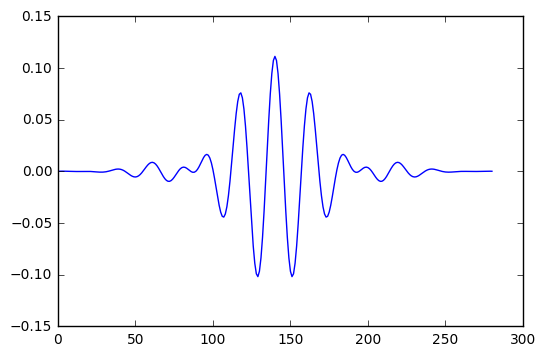

In [40]:
z = [float(x)-2*float(y) for x,y in zip(matdata['bAlpha'][0], taps)]
plt.plot(z)

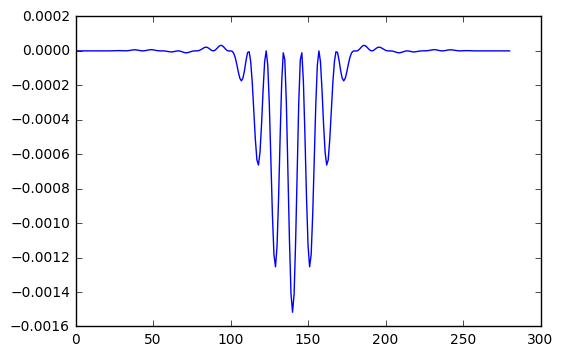

In [27]:
y = [float(x)*float(y) for x,y in zip(matdata['bAlpha'][0], taps)]
plt.plot(y)

In [26]:
y

[1.3125775202714487,
 1.3355437595260433,
 1.3568833197877874,
 1.3766235462751526,
 1.3947810022452323,
 1.4113726115621517,
 1.4264250732980006,
 1.4400013331898445,
 1.4523434566663755,
 1.4667126335784249,
 1.4672822543699824,
 1.4758434170658419,
 1.4817001484333316,
 1.4857723424332827,
 1.4881923997252513,
 -2.535847743158167,
 1.4881923997253883,
 1.4857723424333473,
 1.481700148433362,
 1.4758434170658703,
 1.4672822543700186,
 1.466712633578389,
 1.4523434566663955,
 1.4400013331898425,
 1.4264250732980177,
 1.4113726115621528,
 1.3947810022452334,
 1.376623546275163,
 1.3568833197877839,
 1.335543759526047,
 1.3125775202714514,
 1.287888253910603,
 1.2537795034088013,
 1.234772894370062,
 1.2051734219897967,
 1.1740570096002871,
 1.1413009739414222,
 1.1068647547949695,
 1.0707181101854188,
 1.0328307541847714,
 0.9931692001761151,
 0.9516947310044025,
 0.908359403219552,
 0.8630598817849093,
 0.8160489835673281,
 0.7667904557228835,
 0.7154625484614152,
 0.6619463234125851,